# Generating Chirp

In [1]:
import math
import cmath
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def polynomialPhase(coeffs:list,t:int)->int:
    """
    Generate the polynomial phase 
    """
    total = 0
    for i in range(1,len(coeffs)+1):
        total += coeffs[i-1]*(t**i/math.factorial(i))
    return total

In [3]:
def chirp(coeffs:list,nS:int,f:int)->list:
    """
    Generate a sample chirp given coeffs, number of samples and frequency 
    """
    outer = []
    for n in range (0,nS):
        temp = cmath.exp(2j*math.pi*(polynomialPhase(coeffs,n/f)))
        outer.append(temp)
    return outer

In [4]:
nSamples = 10000
samplingFrequency = 2000
def plot_chirp(coeffs:list)->list:
    p = chirp(coeffs,nSamples,samplingFrequency)
    points = [i.real for i in p]
    plt.plot(points)
    return p

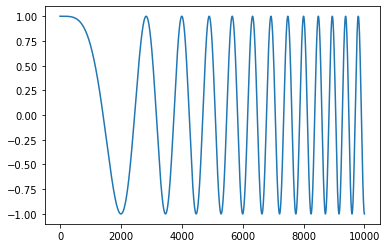

In [5]:
p = plot_chirp([0,1])

# Generating White Noise

In [6]:
def complexWhiteNoise(nS:int)->list:
    realDist = np.random.normal(0,1/math.sqrt(2),nS)
    imgDist = np.random.normal(0,1/math.sqrt(2),nS)
    return realDist + imgDist*1j

In [7]:
snr = 10
whiteNoisePoints = complexWhiteNoise(nSamples)/(10**(snr/20))
noisyPoints = p + whiteNoisePoints

C:\Users\omari\anaconda3\lib\site-packages\numpy\core\_asarray.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


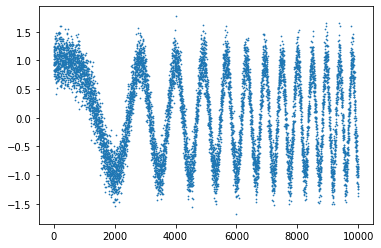

In [8]:
plt.scatter(range(0,len(noisyPoints)),noisyPoints,s=0.5)

# Normalizing 

In [9]:
def normalize(v:list)->list:
    denominator = 0 
    for i in v:
        denominator += abs(i)**2
    return [i/math.sqrt(denominator) for i in v]

In [10]:
def normalizedMF(signal:list,template:list)->list:
    return np.correlate(normalize(signal),normalize(template),mode="full")

In [11]:
plot_n = normalizedMF(np.array(noisyPoints),np.array(p))

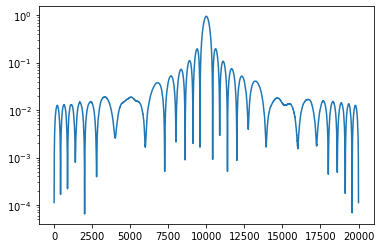

In [12]:
plt.plot([abs(i) for i in plot_n])
plt.yscale("log")

# Ideal Chirps

In [13]:
param_dict = {"Air Mode 1":[9750,1],"Air Mode 2":[9750,30],"Air Mode 3":[9750,14],"Air Mode 4":[9750,29],
               "Weather Mode 1":[9500,382],"Weather Mode 2":[9500,131],"Weather Mode 3":[9500,1000],
               "Weather Mode 4":[9500,375],"Weather Mode 5":[9500,300],"Marine Mode 1":[9410,400],
               "Marine Mode 2":[9410,111],"Marine Mode 3":[9410,440],"Marine Mode 4":[9410,500],
               "Marine Mode 5":[9410,139],"Marine Mode 6":[9410,50]}

In [14]:
samplingFrequency = 1200
nSamples = 10000
ideal_chirps = [chirp(i,nSamples,samplingFrequency)for i in list(param_dict.values())]

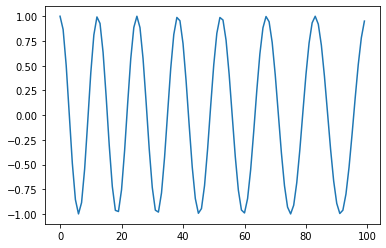

In [15]:
p = [i.real for i in ideal_chirps[4][0:100]]  #plotting first 100 values of ideal chirp 4
plt.plot(p)

In [16]:
def absMFOutputs(signal:list,template:list)->list:
    return [abs(i) for i in normalizedMF(signal,template)]

In [23]:
def allAbsMFOutputs(ideal_chirps:list)->list:
    idealAbsMFOuputs = []
    for i in ideal_chirps:
        ideal_chirp_MF = []
        for j in ideal_chirps:
            ideal_chirp_MF += absMFOutputs(i,j)
        idealAbsMFOuputs.append(ideal_chirp_MF)
    return idealAbsMFOuputs

In [29]:
idealAbsMFOutputsList = allAbsMFOutputs(ideal_chirps[0:5])

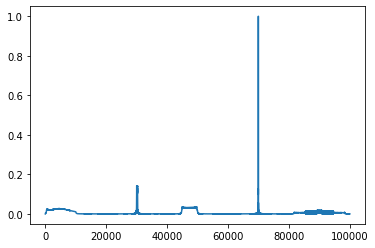

In [30]:
plt.plot(idealAbsMFOutputsList[3])